# Линейный конгруэнтный метод
Линейный конгруэнтный метод был предложен Д.Лемером в 1949 году. Суть метода заключается в вычислении последовательности псевдослучайных чисел **X<sub>n</sub>**, полагая что **X<sub>n+1</sub> = (&alpha;X<sub>n</sub> + c) _mod m_**,
где **_m_** – модуль **(_m_ ≥ 2)**, a – множитель **(0 ≤ &alpha; < _m_)**, **c** – приращение **(0 ≤ _c_ < _m_)**, X<sub>0</sub> – начальное значение **(0 ≤ _X<sub>0</sub>_ < _m_)**.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [93]:
class LKRandomGenerator:
    prevX = 2032307
    m = 2**16
    c = 1002769
    a = 53597
    def getNext(self):
        LKRandomGenerator.prevX = (self.a*self.prevX+self.c)%self.m
        return self.prevX

In [89]:
random = LKRandomGenerator()

randoms = []
for i in range(0,1000000):
    randoms.append(random.getNext())

(array([10004.,  9983., 10016.,  9997., 10002., 10006.,  9995., 10003.,
         9973.,  9995., 10000.,  9999., 10013.,  9998., 10002.,  9990.,
        10003.,  9998.,  9979., 10005., 10010.,  9975., 10000.,  9993.,
         9994., 10008., 10001.,  9996., 10009.,  9989.,  9992., 10006.,
         9990.,  9970., 10007.,  9988.,  9996., 10001.,  9974., 10001.,
        10016.,  9994., 10019., 10010.,  9985., 10012., 10009.,  9993.,
        10014., 10000.,  9996., 10012.,  9990.,  9981., 10006.,  9997.,
         9995., 10007., 10017.,  9980., 10009.,  9998., 10020., 10005.,
         9989., 10001., 10003.,  9996., 10007.,  9987.,  9977., 10010.,
         9997.,  9980., 10000., 10001.,  9997., 10006., 10003.,  9995.,
        10007., 10002., 10007., 10034., 10012., 10009., 10000.,  9985.,
        10022.,  9997., 10002.,  9999.,  9989.,  9991., 10009., 10014.,
        10000., 10037., 10004., 10005.]),
 array([    0.  ,   655.35,  1310.7 ,  1966.05,  2621.4 ,  3276.75,
         3932.1 ,  4587.45

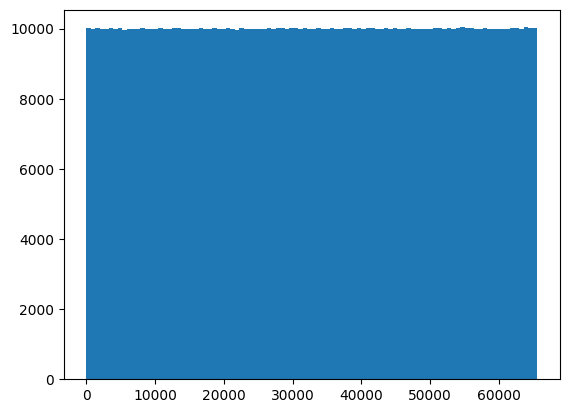

In [90]:
plt.hist(randoms, bins=100)

In [91]:
first = randoms[0]
index = randoms.index(first, 1)
print("Период генератора ", index)

Период генератора  65536


Можно заметить, что период генертора равен модулю, так происходит, потому что при создании генератора были использованы простые числа в качестве остальных параметров.

# Генератор нормально распределённых случайных чисел 
Нормальное распределение, также называемое распределением Гаусса.

Важное значение нормального распределения вытекает из центральной предельной теоремы теории вероятностей. 

Для программного генерирования нормально распределённых псевдослучайных величин можно использовать преобразование Бокса-Мюллера. Оно позволяет сгенерировать две нормально распределённые величины на базе двух равномерно распределённых.

Пусть X и Y— независимые случайные величины, равномерно распределённые на отрезке [−1,1]. Вычислим  S= X^2+Y^2. Если окажется, что S > 1или S = 0, то значения X и Y следует «выбросить» и сгенерировать заново. Когда будет выполнено условие,            0 < S ≤ 1 , X и Y будут координатами случайного вектора, равномерно распределённого в круге с центром в начале координат и с радиусом 1. Далее расчитаем по формулам Z_1 и Z_2:
$$Z_1=X\sqrt{\frac{-2lnS}{S}}$$

$$Z_2=Y\sqrt{\frac{-2lnS}{S}}$$


Z_1 и Z_2 будут независимы и распределены нормально с матожиданием 0 и дисперсией 1.

In [131]:
class NormRandomGenerator:
    random = LKRandomGenerator()
    m = random.m / 2
    Z2 = -1
    def getNext(self):
        if(self.Z2 != -1):
            Z = self.Z2
            NormRandomGenerator.Z2 = -1
            return Z
        
        S, X, Y = self.getS()
        Z1 = X * np.sqrt(-2 * np.log(S) / S)
        NormRandomGenerator.Z2 = Y * np.sqrt(-2 * np.log(S) / S)
        return Z1
    
    def getS(self):
        X = (self.random.getNext() - self.m) / self.m
        Y = (self.random.getNext() - self.m) / self.m
        S = X**2 + Y**2
        if S > 1 or S <= 0:
            S, X, Y = self.getS()
        return (S, X, Y)

In [132]:
normRandom = NormRandomGenerator()

In [170]:
normRandoms = []
counts = 1000000
for i in range(0,counts):
    normRandoms.append(normRandom.getNext())

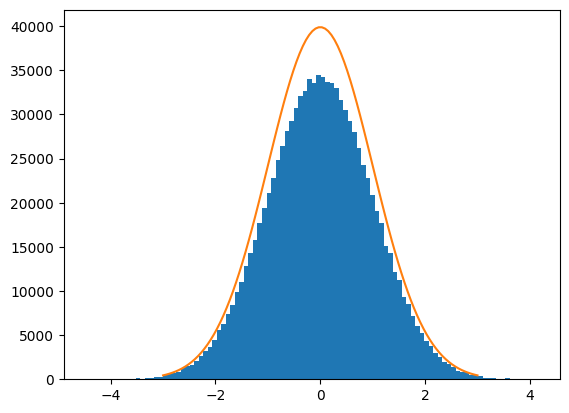

In [171]:
fig, ax = plt.subplots()
n_bins = 100
ax.hist(normRandoms, bins=n_bins)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax.plot(x, stats.norm.pdf(x, mu, sigma) * 100000)